In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

data = pd.read_csv("stats.csv")
data

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,...,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,sprint_speed
0,"Ortiz, David",120074,2016,40,537,626,169,82,48,1,...,93.2,16.9,39.3,15.5,47.2,103.045534,96.143184,19.4,43.5,23.6
1,"Beltré, Adrian",134181,2016,37,583,640,175,111,31,1,...,90.1,14.5,34.2,8.5,40.4,99.676160,94.135211,15.2,48.7,25.9
2,"Beltrán, Carlos",136860,2016,39,552,593,163,101,33,0,...,90.1,12.6,32.5,6.8,38.5,100.288108,94.247053,19.6,45.6,25.7
3,"Werth, Jayson",150029,2016,37,525,606,128,79,28,0,...,91.4,15.0,31.9,7.4,44.6,101.514040,95.154871,20.9,38.1,25.8
4,"Martinez, Victor",400121,2016,37,553,610,160,111,22,0,...,90.0,15.5,37.8,8.4,42.1,99.515406,94.050070,17.2,46.4,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,"Chourio, Jackson",694192,2024,20,528,573,145,91,29,4,...,89.7,7.6,33.2,7.8,44.9,100.832970,94.831073,27.1,48.8,29.7
1229,"Schanuel, Nolan",694384,2024,22,519,607,130,98,19,0,...,86.1,10.3,36.4,3.5,25.4,95.305191,91.662607,14.4,41.8,26.4
1230,"Langford, Wyatt",694671,2024,22,499,557,126,81,25,4,...,89.6,16.6,31.3,9.3,43.4,101.211099,94.807366,22.9,42.8,29.8
1231,"Young, Jacob",696285,2024,24,468,521,120,92,24,1,...,85.8,4.0,28.1,1.6,28.9,96.872142,92.486925,19.3,44.9,29.7


In [8]:
pip install scikit-learn


   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------- ----------------------------- 2.4/9.3 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 4.7/9.3 MB 10.9 MB/s eta 0:00:01
   ------------------------------ --------- 7.1/9.3 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


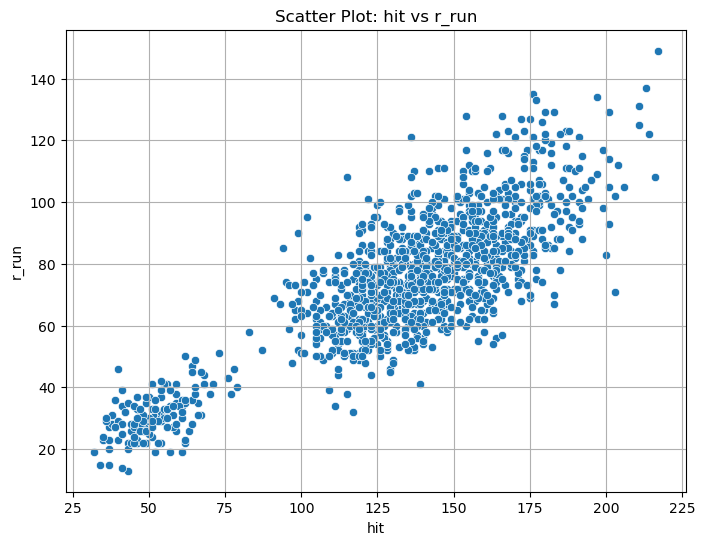

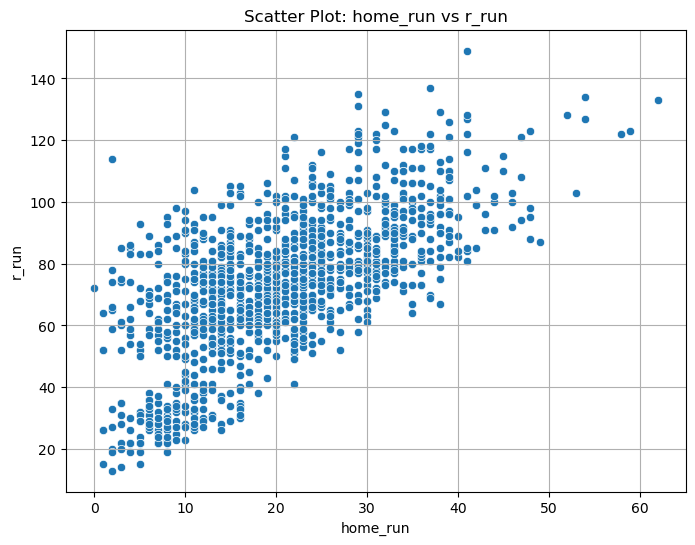

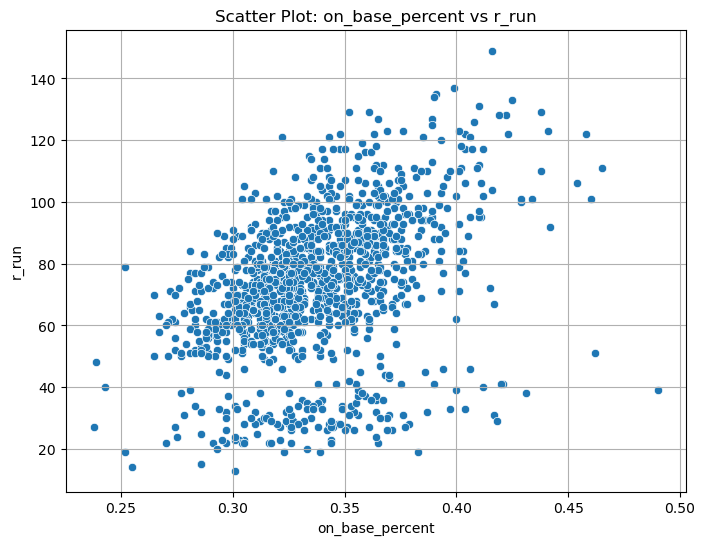

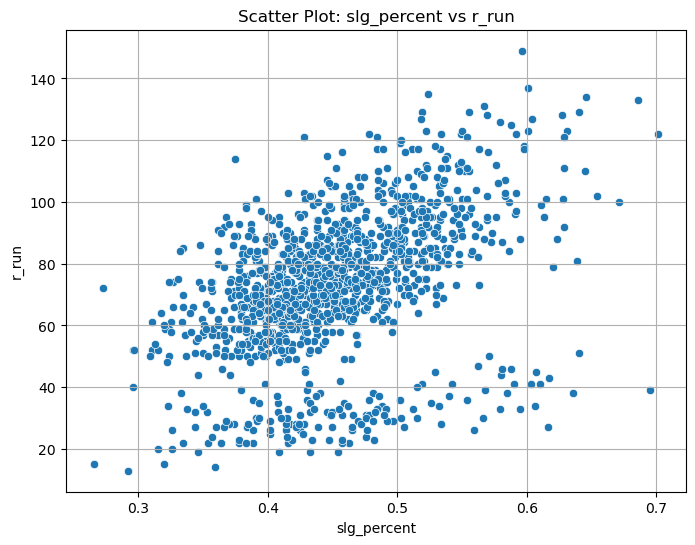

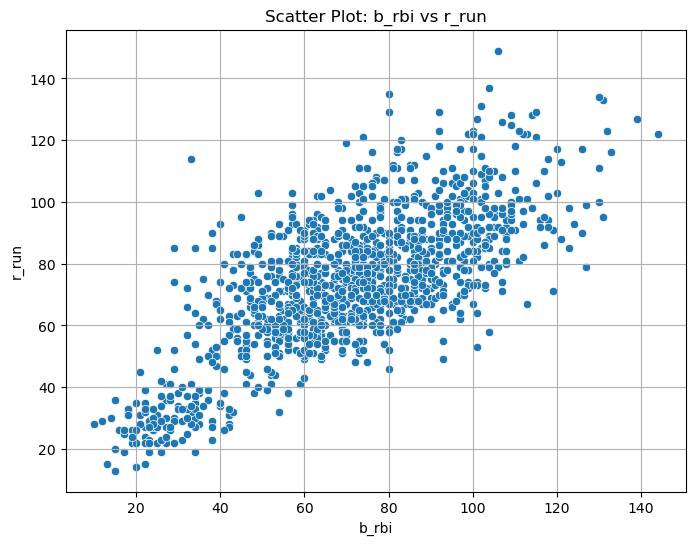

In [18]:
import matplotlib.pyplot as plt

variables = ['hit', 'home_run', 'on_base_percent', 'slg_percent', 'b_rbi']
target = 'r_run'  


for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[var], y=data[target])
    plt.title(f"Scatter Plot: {var} vs {target}")
    plt.xlabel(var)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()


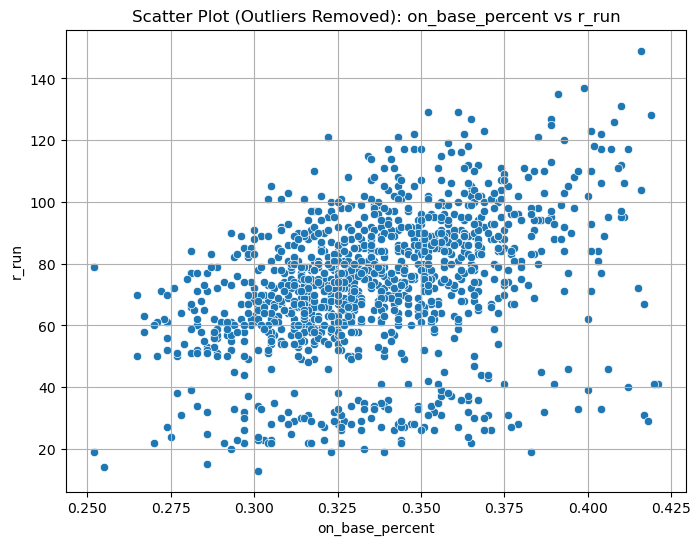

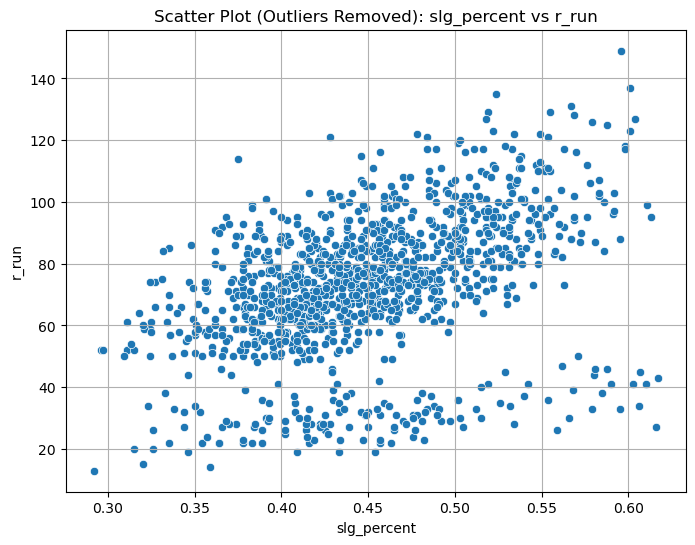

In [20]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create a copy of the data for cleaning
data_cleaned = data.copy()

# Remove outliers for 'on_base_percent' and 'slg_percent'
data_cleaned = remove_outliers(data_cleaned, 'on_base_percent')
data_cleaned = remove_outliers(data_cleaned, 'slg_percent')

# Plot scatter plots for 'on_base_percent' and 'slg_percent' against 'r_run' after outlier removal
for var in ['on_base_percent', 'slg_percent']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_cleaned[var], y=data_cleaned['r_run'])
    plt.title(f"Scatter Plot (Outliers Removed): {var} vs r_run")
    plt.xlabel(var)
    plt.ylabel("r_run")
    plt.grid(True)
    plt.show()


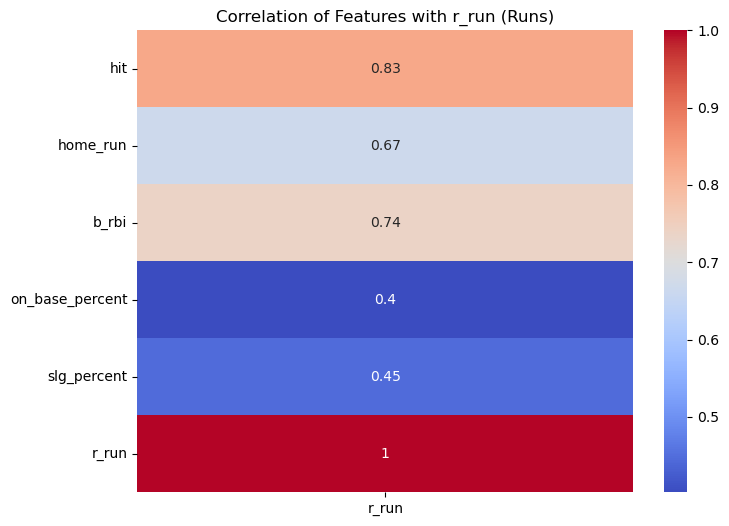

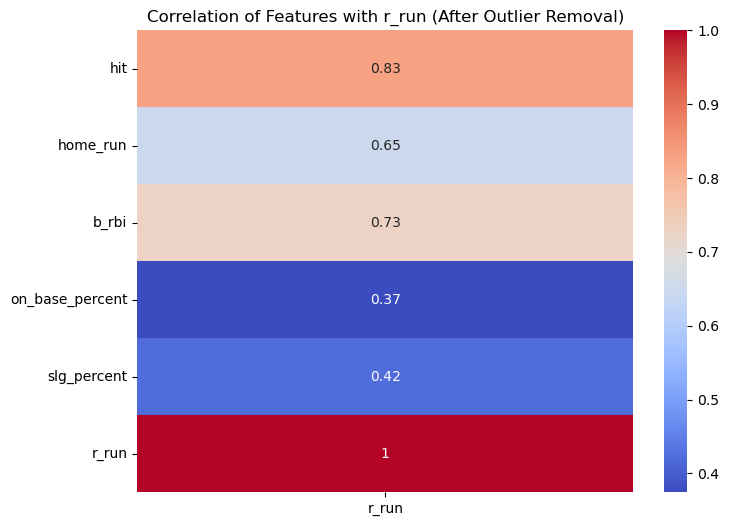

Correlation with r_run:
r_run              1.000000
hit                0.829472
b_rbi              0.727656
home_run           0.649281
slg_percent        0.420446
on_base_percent    0.374408
Name: r_run, dtype: float64


In [50]:
file_path = 'stats.csv'  # 사용자 제공 경로
data = pd.read_csv(file_path)

selected_columns = ['hit', 'home_run', 'b_rbi', 'on_base_percent', 'slg_percent', 'r_run']

correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['r_run']], annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation of Features with r_run (Runs)")
plt.show()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_cleaned = data.copy()
data_cleaned = remove_outliers(data_cleaned, 'on_base_percent')
data_cleaned = remove_outliers(data_cleaned, 'slg_percent')

correlation_matrix_cleaned = data_cleaned[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_cleaned[['r_run']], annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation of Features with r_run (After Outlier Removal)")
plt.show()

correlation_with_r_run = correlation_matrix_cleaned['r_run'].sort_values(ascending=False)
print("Correlation with r_run:")
print(correlation_with_r_run)


In [66]:
from scipy.stats import shapiro, levene, ttest_ind, ranksums

file_path = 'stats.csv'  # 데이터 파일 경로
data = pd.read_csv(file_path)

def perform_hypothesis_testing(data, feature, target):
    median_value = data[feature].median()
    high_group = data[data[feature] > median_value][target]
    low_group = data[data[feature] <= median_value][target]

    _, p_high_normal = shapiro(high_group)
    _, p_low_normal = shapiro(low_group)

    _, p_equal_var = levene(high_group, low_group)

    if p_high_normal > 0.05 and p_low_normal > 0.05 and p_equal_var > 0.05:
        t_stat, p_value = ttest_ind(high_group, low_group, equal_var=True)
        test_used = "T-test"
    else:
        t_stat, p_value = ranksums(high_group, low_group)
        test_used = "Wilcoxon rank-sum test"

    return {
        "Feature": feature,
        "Test Used": test_used,
        "T-Statistic": t_stat,
        "P-Value": p_value,
        "Normality P-High": p_high_normal,
        "Normality P-Low": p_low_normal,
        "Equal Variance P": p_equal_var,
    }

variables_to_test = ['hit', 'home_run', 'b_rbi']  # 주요 변수
results = []

for var in variables_to_test:
    result = perform_hypothesis_testing(data, var, 'r_run')  # 'r_run'은 득점(Target Variable)
    results.append(result)

results_df = pd.DataFrame(results)
results_df


,Feature,Test Used,T-Statistic,P-Value,Normality P-High,Normality P-Low,Equal Variance P
0,hit,Wilcoxon rank-sum test,21.234093,4.625356e-100,8.474007e-07,1.103716e-09,0.000009
1,home_run,Wilcoxon rank-sum test,19.751302,7.817600e-87,6.601789e-06,4.708827e-10,0.000032
2,b_rbi,Wilcoxon rank-sum test,19.400717,7.610214e-84,1.453618e-06,1.174459e-09,0.000009


In [68]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 회귀분석

features = ['hit', 'home_run', 'b_rbi'] 
target = 'r_run'  

X = data_cleaned[features]  
y = data_cleaned[target]  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print("Regression Results Summary:")
print(model.summary())

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nMulticollinearity Check (VIF):")
print(vif_data)


Regression Results Summary:
                            OLS Regression Results                            
Dep. Variable:                  r_run   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1550.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        02:50:53   Log-Likelihood:                -4482.7
No. Observations:                1203   AIC:                             8973.
Df Residuals:                    1199   BIC:                             8994.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0088   